In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

RANDOM_STATE = 42

In [11]:
# Load the dataset
df = pd.read_csv("../data/Telco_Data.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Overview
- Shape
- Dtypes
- Missing values

In [12]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Target Analysis
- Class balance
- Baseline accuracy

In [ ]:
# Check class distribution
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

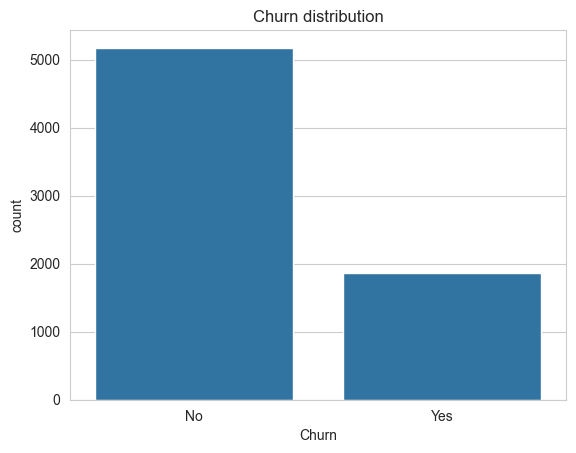

In [14]:
sns.countplot(data=df, x="Churn")
plt.title("Churn distribution")
plt.show()

# 3. Univariate Analysis
- Numéricas
- Categóricas

In [16]:
# Convert TotalCharges to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


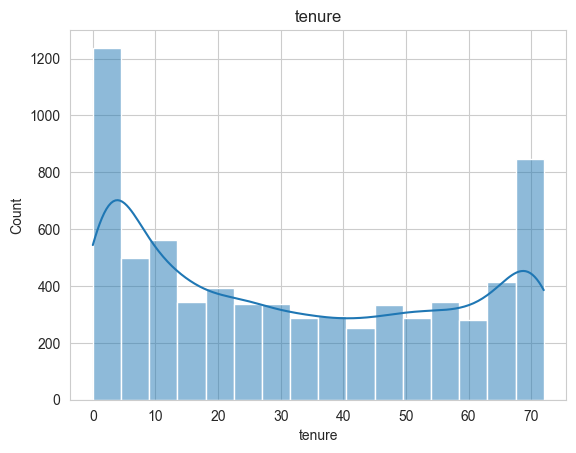

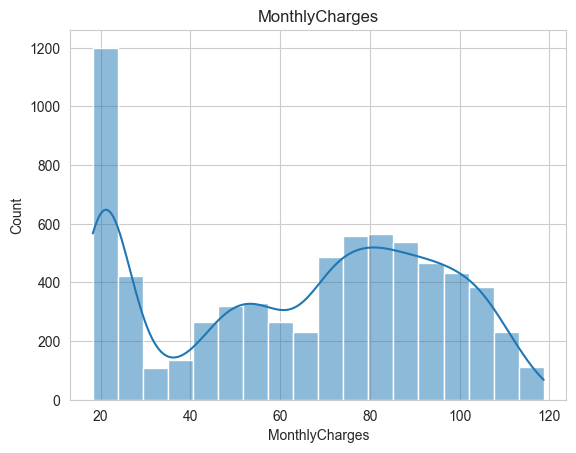

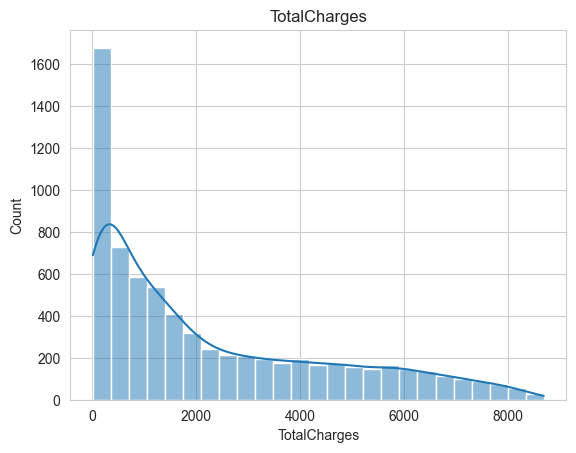

In [ ]:
# Plot distributions of numeric features
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

# 4. Bivariate vs Churn
- tenure vs churn
- Contract vs churn
- MonthlyCharges vs churn

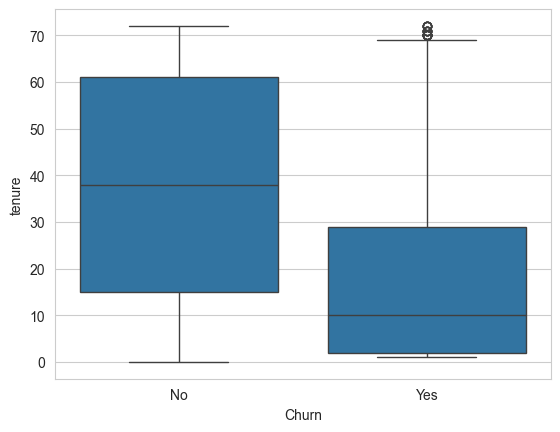

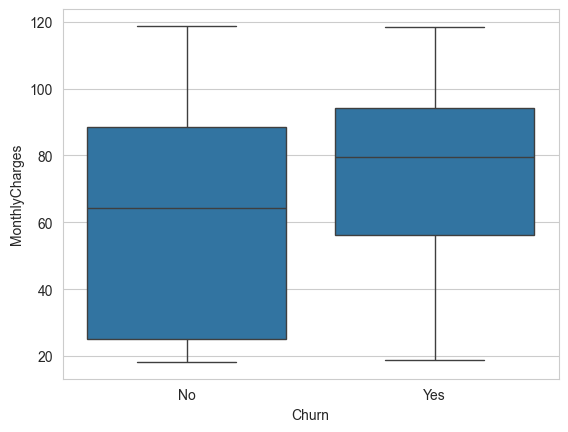

In [18]:
sns.boxplot(data=df, x="Churn", y="tenure")
plt.show()

sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.show()

# 5. Categorical vs Churn
- tenure vs churn
- Contract vs churn
- MonthlyCharges vs churn

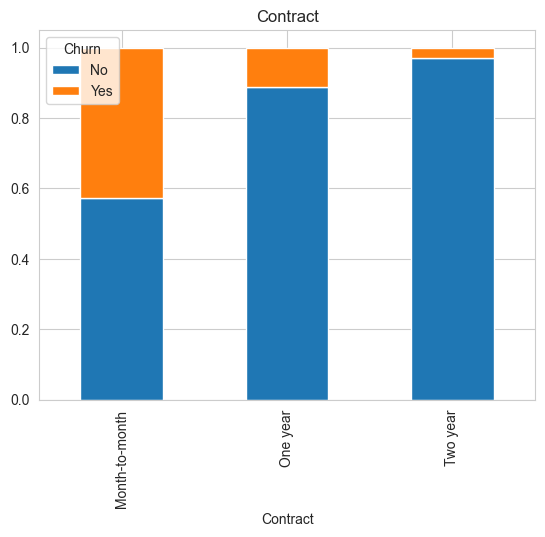

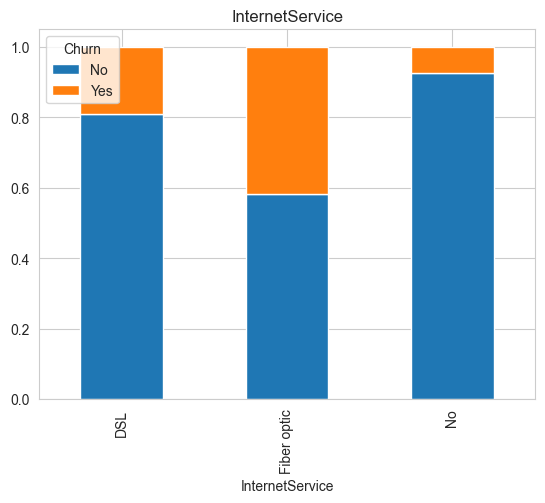

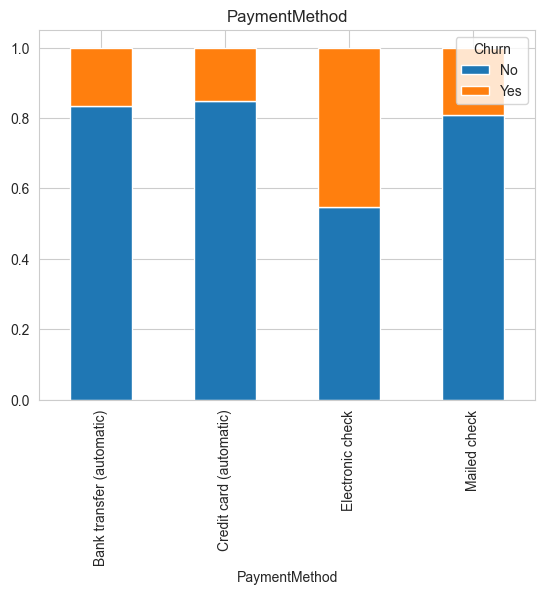

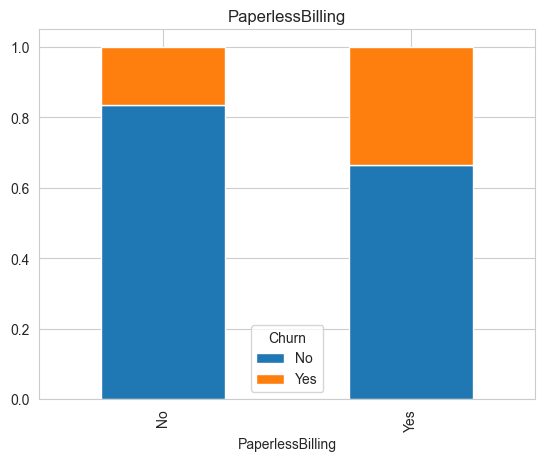

In [19]:
categoricals = [
    "Contract",
    "InternetService",
    "PaymentMethod",
    "PaperlessBilling"
]

for col in categoricals:
    ct = pd.crosstab(df[col], df["Churn"], normalize="index")
    ct.plot(kind="bar", stacked=True)
    plt.title(col)
    plt.show()

# 6. Insights
## Key Insights

1. Dataset contains 7043 customers with moderate class imbalance (~26% churn).
2. TotalCharges is incorrectly typed as object and must be converted to numeric.
3. Customers with month-to-month contracts show significantly higher churn.
4. Lower tenure strongly correlates with churn.
5. Electronic check payment method appears associated with higher churn.
6. Fiber optic users show higher churn compared to DSL users.

## Technical decision I can already take
1. TotalCharges must be converted to numeric
2. Missing values are likely tied to conversion issues
3. Many categorical variables → OneHotEncoder will be required
4. No obvious data leakage detected
5. Tree-based boosting models will likely perform strongly